In [1]:
!pip install spotipy

Defaulting to user installation because normal site-packages is not writeable


In [81]:
from spotipy import Spotify as sp
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import oauth2
from functools import reduce
import os
import random
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
import spotipy
import spotipy.util as util
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler


In [82]:
# spotify api credentials
cid = 'client id here'
secret = 'secret hee'
redirect_uri='http://localhost:8000/callback'
username = 'spotify username here'

In [83]:
# auth
scope = 'user-top-read playlist-modify-public playlist-modify-private'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
    print("connected")
else:
    print("no token for: ", username)

connected


In [84]:
# top 50 tracks
results = sp.current_user_top_tracks(limit=50, offset=0,time_range='short_term')
#results

In [85]:
# function to get more than 100 songs from api
def more_than_hundred_songs(username, playlist_id, fields = None):
    response = sp.user_playlist_tracks(username, playlist_id, fields = fields, limit = 100)
    results = response["items"]
    while(len(results) < response["total"]):
        response = sp.user_playlist_tracks(username, playlist_id, fields = fields, limit=100, offset=len(results))
        results.extend(response["items"])
    return results

In [86]:
def analyze_playlist(creator, playlist_id):

    # Create empty dataframe
    playlist_features_list = ["id", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness",  "key", "liveness", "loudness", "mode", "speechiness", "tempo", "valence"]
    #["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]

    playlist_df = pd.DataFrame(columns = playlist_features_list)

    # Loop through every track in the playlist, extract features and append the features to the playlist df
    ##["id", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness",  "key", "liveness", "loudness", "mode", "speechiness", "tempo", "valence"]]
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]

        playlist_features["track_id"]

        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]

        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    return playlist_df

In [8]:
# test playlist
# https://open.spotify.com/playlist/4gBzNWPlHaIgRLg3dGjtPa?si=bf9213c1e0e448d0
# id 4gBzNWPlHaIgRLg3dGjtPa

In [108]:
playlist_id = '4gBzNWPlHaIgRLg3dGjtPa'

In [109]:
analyze_playlist(username, playlist_id)

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist,album,track_name,track_id
0,NaN,NaN,NaN,NaN,0.6040,0.154000,4,0.1660,-6.014,0,0.0286,137.388,0.1870,Opeth,Damnation,In My Time of Need,3WtsQAngIkmcNeqVeK3fXQ
1,NaN,NaN,NaN,NaN,0.7710,0.008950,4,0.0788,-11.938,0,0.0528,100.302,0.2400,Pink Floyd,The Division Bell,Keep Talking,0vI64OhYqTo6KYswDlx0yT
2,NaN,NaN,NaN,NaN,0.6150,0.179000,2,0.1990,-8.957,0,0.0293,101.888,0.0814,Dream Theater,Awake,Space-Dye Vest,5PtA2XXIrUWLZ3ZELnTOUi
3,NaN,NaN,NaN,NaN,0.4800,0.079000,2,0.1330,-9.021,1,0.0249,139.170,0.1220,Opeth,Damnation,Hope Leaves,05lem7bHWxyo98HOwPmils
4,NaN,NaN,NaN,NaN,0.8940,0.170000,11,0.2670,-4.682,0,0.0568,82.305,0.3040,A Perfect Circle,Mer De Noms,Judith,5KDNFlHAdDJ84fhK27c35X
5,NaN,NaN,NaN,NaN,0.0109,0.000000,7,0.1410,-20.469,0,0.0419,113.321,0.0768,Jeff Buckley,You and I (Expanded Edition),Mojo Pin,4VCNnwww8CmQqRZNF9T6wL
6,NaN,NaN,NaN,NaN,0.9520,0.065900,8,0.0595,-5.210,0,0.1130,174.978,0.0883,Igorrr,Savage Sinusoid,Opus Brain,4B0NS0jrYy9CeFLsZsT7oQ
7,NaN,NaN,NaN,NaN,0.2180,0.001200,11,0.1090,-13.131,0,0.0478,129.744,0.0396,Barış Diri,Derinden / bazen hayat çok kötü gidiyor ve ben...,Derinden / bazen hayat çok kötü gidiyor ve ben...,1iFGzZThVz7rYr2uqaTffV
8,NaN,NaN,NaN,NaN,0.3640,0.945000,8,0.1170,-11.336,1,0.0311,136.156,0.1370,Barış Demirel - Barıştık Mı,Fail Play,Kanadıkırık,6zUL3SMt5oLCQHlDHszKJU
9,NaN,NaN,NaN,NaN,0.6090,0.018800,4,0.1600,-5.011,0,0.0296,105.999,0.1910,Shamrain,Goodbye To All That,Raindrops,2HEmAttobAQzfNJMqJqP2y


In [12]:
# analyze multiple playlists
def analyze_playlist_dict(playlist_dict):

    # Loop through every playlist in the dict and analyze it
    for i, (key, val) in enumerate(playlist_dict.items()):
        playlist_df = analyze_playlist(*val)
        # Add a playlist column so that we can see which playlist a track belongs too
        #playlist_df["playlist"] = key
        # Create or concat df
        if i == 0:
            playlist_dict_df = playlist_df
        else:
            playlist_dict_df = pd.concat([playlist_dict_df, playlist_df], ignore_index = True)

    return playlist_dict_df

In [14]:
#multiple_playlist_df = analyze_playlist_dict(playlist_dict)
#multiple_playlist_df#["playlist"].value_counts()
#multiple_playlist_df

In [110]:
#Create a dataframe of your playlist including tracks' names and audio features

sourcePlaylist = sp.playlist(playlist_id, fields="tracks,next")
tracks = sourcePlaylist["tracks"];
songs = tracks["items"];

while tracks['next']:
    sourcePlaylist = sp.next(tracks)

track_ids = []
track_names = []

for i in range(0, len(songs)):
    if songs[i]['track']['id'] != None: # Removes the local tracks in your playlist if there is any
        track_ids.append(songs[i]['track']['id'])
        track_names.append(songs[i]['track']['name'])

features = []
for i in range(0,len(track_ids)):
    audio_features = sp.audio_features(track_ids[i])
    for track in audio_features:
        features.append(track)

playlist_df = pd.DataFrame(features, index = track_names)

In [111]:
playlist_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
In My Time of Need,0.471,0.6040,4,-6.014,0,0.0286,0.001610,0.154000,0.1660,0.1870,137.388,audio_features,3WtsQAngIkmcNeqVeK3fXQ,spotify:track:3WtsQAngIkmcNeqVeK3fXQ,https://api.spotify.com/v1/tracks/3WtsQAngIkmc...,https://api.spotify.com/v1/audio-analysis/3Wts...,346733,4
Keep Talking,0.497,0.7710,4,-11.938,0,0.0528,0.187000,0.008950,0.0788,0.2400,100.302,audio_features,0vI64OhYqTo6KYswDlx0yT,spotify:track:0vI64OhYqTo6KYswDlx0yT,https://api.spotify.com/v1/tracks/0vI64OhYqTo6...,https://api.spotify.com/v1/audio-analysis/0vI6...,370667,4
Space-Dye Vest,0.564,0.6150,2,-8.957,0,0.0293,0.174000,0.179000,0.1990,0.0814,101.888,audio_features,5PtA2XXIrUWLZ3ZELnTOUi,spotify:track:5PtA2XXIrUWLZ3ZELnTOUi,https://api.spotify.com/v1/tracks/5PtA2XXIrUWL...,https://api.spotify.com/v1/audio-analysis/5PtA...,449107,4
Hope Leaves,0.501,0.4800,2,-9.021,1,0.0249,0.580000,0.079000,0.1330,0.1220,139.170,audio_features,05lem7bHWxyo98HOwPmils,spotify:track:05lem7bHWxyo98HOwPmils,https://api.spotify.com/v1/tracks/05lem7bHWxyo...,https://api.spotify.com/v1/audio-analysis/05le...,267147,4
Judith,0.366,0.8940,11,-4.682,0,0.0568,0.000034,0.170000,0.2670,0.3040,82.305,audio_features,5KDNFlHAdDJ84fhK27c35X,spotify:track:5KDNFlHAdDJ84fhK27c35X,https://api.spotify.com/v1/tracks/5KDNFlHAdDJ8...,https://api.spotify.com/v1/audio-analysis/5KDN...,247267,3
Mojo Pin,0.385,0.0109,7,-20.469,0,0.0419,0.859000,0.000000,0.1410,0.0768,113.321,audio_features,4VCNnwww8CmQqRZNF9T6wL,spotify:track:4VCNnwww8CmQqRZNF9T6wL,https://api.spotify.com/v1/tracks/4VCNnwww8CmQ...,https://api.spotify.com/v1/audio-analysis/4VCN...,422599,3
Opus Brain,0.391,0.9520,8,-5.210,0,0.1130,0.000777,0.065900,0.0595,0.0883,174.978,audio_features,4B0NS0jrYy9CeFLsZsT7oQ,spotify:track:4B0NS0jrYy9CeFLsZsT7oQ,https://api.spotify.com/v1/tracks/4B0NS0jrYy9C...,https://api.spotify.com/v1/audio-analysis/4B0N...,325714,4
Derinden / bazen hayat çok kötü gidiyor ve ben onu nasıl anlatacağımı bilemiyorum,0.668,0.2180,11,-13.131,0,0.0478,0.818000,0.001200,0.1090,0.0396,129.744,audio_features,1iFGzZThVz7rYr2uqaTffV,spotify:track:1iFGzZThVz7rYr2uqaTffV,https://api.spotify.com/v1/tracks/1iFGzZThVz7r...,https://api.spotify.com/v1/audio-analysis/1iFG...,185538,4
Kanadıkırık,0.568,0.3640,8,-11.336,1,0.0311,0.707000,0.945000,0.1170,0.1370,136.156,audio_features,6zUL3SMt5oLCQHlDHszKJU,spotify:track:6zUL3SMt5oLCQHlDHszKJU,https://api.spotify.com/v1/tracks/6zUL3SMt5oLC...,https://api.spotify.com/v1/audio-analysis/6zUL...,298000,4
Raindrops,0.466,0.6090,4,-5.011,0,0.0296,0.004680,0.018800,0.1600,0.1910,105.999,audio_features,2HEmAttobAQzfNJMqJqP2y,spotify:track:2HEmAttobAQzfNJMqJqP2y,https://api.spotify.com/v1/tracks/2HEmAttobAQz...,https://api.spotify.com/v1/audio-analysis/2HEm...,270293,4


In [112]:
playlist_df = playlist_df[["id", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness",  "key", "liveness", "loudness", "mode", "speechiness", "tempo", "valence"]]

In [113]:
len(playlist_df)

34

In [114]:
# rating tracks """"""randomly""""""
numbers = []
for dd in range(len(playlist_df)):
    numbers.append(random.randint(3,10))

len(numbers),numbers.count(10)


(34, 5)

In [115]:
#numbers

In [116]:
playlist_df
playlist_df['ratings']= numbers


# test
playlist_df.head()



#numbers
#for i in range(len(playlist_df)):
#    playlist_df[i]['ratings']=random.randint(0,10)

#for i in range(len(playlist_df)):
#    print(playlist_df['ratings'][i])
#

/tmp/ipykernel_41595/3972750574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist_df['ratings']= numbers


,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,ratings
In My Time of Need,3WtsQAngIkmcNeqVeK3fXQ,0.001610,0.471,346733,0.604,0.15400,4,0.1660,-6.014,0,0.0286,137.388,0.1870,3
Keep Talking,0vI64OhYqTo6KYswDlx0yT,0.187000,0.497,370667,0.771,0.00895,4,0.0788,-11.938,0,0.0528,100.302,0.2400,8
Space-Dye Vest,5PtA2XXIrUWLZ3ZELnTOUi,0.174000,0.564,449107,0.615,0.17900,2,0.1990,-8.957,0,0.0293,101.888,0.0814,4
Hope Leaves,05lem7bHWxyo98HOwPmils,0.580000,0.501,267147,0.480,0.07900,2,0.1330,-9.021,1,0.0249,139.170,0.1220,4
Judith,5KDNFlHAdDJ84fhK27c35X,0.000034,0.366,247267,0.894,0.17000,11,0.2670,-4.682,0,0.0568,82.305,0.3040,6


In [117]:
X_train = playlist_df.drop(['id', 'ratings'], axis=1)
y_train = playlist_df['ratings']


In [118]:
playlist_df

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,ratings
In My Time of Need,3WtsQAngIkmcNeqVeK3fXQ,0.001610,0.471,346733,0.6040,0.154000,4,0.1660,-6.014,0,0.0286,137.388,0.1870,3
Keep Talking,0vI64OhYqTo6KYswDlx0yT,0.187000,0.497,370667,0.7710,0.008950,4,0.0788,-11.938,0,0.0528,100.302,0.2400,8
Space-Dye Vest,5PtA2XXIrUWLZ3ZELnTOUi,0.174000,0.564,449107,0.6150,0.179000,2,0.1990,-8.957,0,0.0293,101.888,0.0814,4
Hope Leaves,05lem7bHWxyo98HOwPmils,0.580000,0.501,267147,0.4800,0.079000,2,0.1330,-9.021,1,0.0249,139.170,0.1220,4
Judith,5KDNFlHAdDJ84fhK27c35X,0.000034,0.366,247267,0.8940,0.170000,11,0.2670,-4.682,0,0.0568,82.305,0.3040,6
Mojo Pin,4VCNnwww8CmQqRZNF9T6wL,0.859000,0.385,422599,0.0109,0.000000,7,0.1410,-20.469,0,0.0419,113.321,0.0768,4
Opus Brain,4B0NS0jrYy9CeFLsZsT7oQ,0.000777,0.391,325714,0.9520,0.065900,8,0.0595,-5.210,0,0.1130,174.978,0.0883,6
Derinden / bazen hayat çok kötü gidiyor ve ben onu nasıl anlatacağımı bilemiyorum,1iFGzZThVz7rYr2uqaTffV,0.818000,0.668,185538,0.2180,0.001200,11,0.1090,-13.131,0,0.0478,129.744,0.0396,6
Kanadıkırık,6zUL3SMt5oLCQHlDHszKJU,0.707000,0.568,298000,0.3640,0.945000,8,0.1170,-11.336,1,0.0311,136.156,0.1370,8
Raindrops,2HEmAttobAQzfNJMqJqP2y,0.004680,0.466,270293,0.6090,0.018800,4,0.1600,-5.011,0,0.0296,105.999,0.1910,4


In [119]:
X_train.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
In My Time of Need,0.001610,0.471,346733,0.604,0.15400,4,0.1660,-6.014,0,0.0286,137.388,0.1870
Keep Talking,0.187000,0.497,370667,0.771,0.00895,4,0.0788,-11.938,0,0.0528,100.302,0.2400
Space-Dye Vest,0.174000,0.564,449107,0.615,0.17900,2,0.1990,-8.957,0,0.0293,101.888,0.0814
Hope Leaves,0.580000,0.501,267147,0.480,0.07900,2,0.1330,-9.021,1,0.0249,139.170,0.1220
Judith,0.000034,0.366,247267,0.894,0.17000,11,0.2670,-4.682,0,0.0568,82.305,0.3040


In [120]:
y_train.head()

In My Time of Need    3
Keep Talking          8
Space-Dye Vest        4
Hope Leaves           4
Judith                6
Name: ratings, dtype: int64

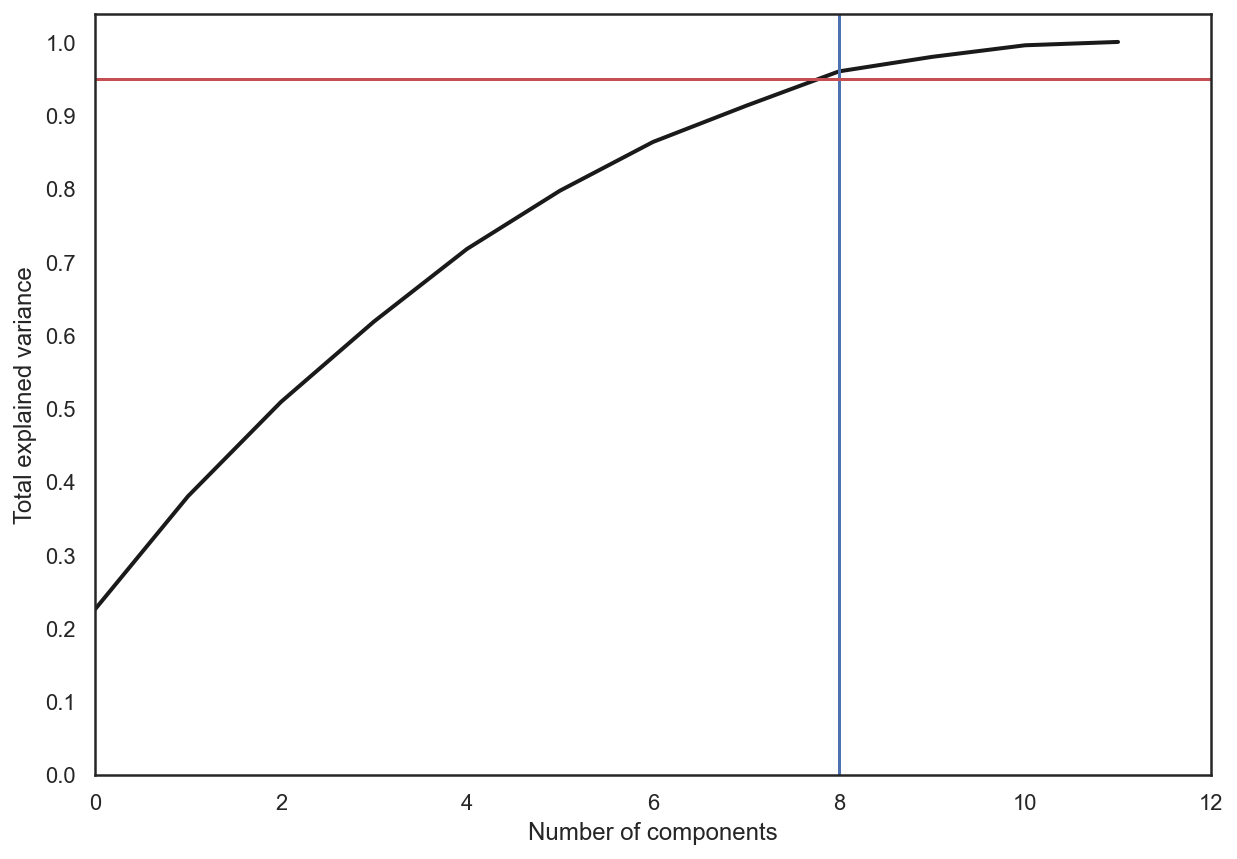

In [151]:
# Apply pca to the scaled train set first

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

X_scaled = StandardScaler().fit_transform(X_train)

pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 12)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(8, c='b') # Tune this so that you obtain at least a 95% total variance explained
plt.axhline(0.95, c='r')
plt.show();


In [152]:
# Fit your dataset to the optimal pca
pca = decomposition.PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 6), max_features=10000)
X_names_sparse = v.fit_transform(track_names)
X_names_sparse.shape


(34, 290)

In [154]:
from scipy.sparse import csr_matrix, hstack

X_train_last = csr_matrix(hstack([X_pca, X_names_sparse]))


In [155]:
X_train_last

<34x298 sparse matrix of type '<class 'numpy.float64'>'
	with 585 stored elements in Compressed Sparse Row format>

In [156]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [157]:
# KNN 1
# train a k-neighbors classifier first and keep the best parameters after a grid search over cross-validation
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'n_neighbors': range(1, 10)}
knn = KNeighborsClassifier(n_jobs=-1)

knn_grid = GridSearchCV(knn, knn_params, cv=skf, n_jobs=-1, verbose=True)
knn_grid.fit(X_train_last, y_train)
knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/lib/python3/dist-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.1s finished


({'n_neighbors': 7}, 0.26666666666666666)

In [128]:
# Random Forests 2
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_features': [4, 7, 8, 10], 'min_samples_leaf': [1, 3, 5, 8], 'max_depth': [3, 5, 8]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42,
                             n_jobs=-1, oob_score=True)
forest_grid = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
forest_grid.fit(X_train_last, y_train)
forest_grid.best_estimator_, forest_grid.best_score_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/lib/python3/dist-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   11.0s finished


(RandomForestClassifier(max_depth=8, max_features=4, n_jobs=-1, oob_score=True,
                        random_state=42),
 0.29047619047619044)

In [129]:
# Decision Trees 3
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params, cv=skf, n_jobs=-1, verbose=True)

tree_grid.fit(X_train_last, y_train)
tree_grid.best_estimator_, tree_grid.best_score_


Fitting 5 folds for each of 150 candidates, totalling 750 fits


/usr/lib/python3/dist-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    0.4s finished


(DecisionTreeClassifier(max_depth=10, max_features=10), 0.3809523809523809)

In [131]:
#playlist_df

In [132]:
# Generate a new dataframe for recommended tracks
# Set recommendation limit as half the Playlist Length per track, you may change this as you like
# Check documentation for  recommendations; https://beta.developer.spotify.com/documentation/web-api/reference/browse/get-recommendations/

rec_tracks = []

for i in playlist_df['id'].values.tolist():
    rec_tracks += sp.recommendations(seed_tracks=[i], limit=int(len(playlist_df)/2))['tracks'];

rec_track_ids = []
rec_track_names = []
for i in rec_tracks:
    rec_track_ids.append(i['id'])
    rec_track_names.append(i['name'])

rec_features = []
for i in range(0,len(rec_track_ids)):
    rec_audio_features = sp.audio_features(rec_track_ids[i])
    for track in rec_audio_features:
        rec_features.append(track)

rec_playlist_df = pd.DataFrame(rec_features, index = rec_track_ids)

In [133]:
# Keep the same features only
rec_playlist_df = rec_playlist_df[["acousticness", "danceability", "duration_ms", "energy", "instrumentalness",  "key", "liveness", "loudness", "mode", "speechiness", "tempo", "valence"]]


In [134]:
rec_playlist_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
6WuqJLVZcyJklg7lIozAO8,0.000660,0.462,302360,0.905,0.040200,0,0.0839,-3.825,0,0.0438,122.925,0.253
58RDwkonFMOkoytBtIQetc,0.359000,0.423,428800,0.738,0.084000,6,0.0801,-7.329,1,0.0319,111.414,0.276
7w0K4TIU7V4Fk0jqgajnYn,0.119000,0.518,287080,0.487,0.000467,7,0.3900,-10.644,0,0.0296,124.981,0.293
5xebjV1wBeJuvjTJ056G2O,0.000696,0.501,268813,0.862,0.000000,11,0.0918,-4.958,0,0.0740,132.036,0.439
3Rzwm8t5pnAws4Qs14ny7w,0.000004,0.257,342147,0.662,0.516000,5,0.0913,-9.781,0,0.0370,140.848,0.391
...,...,...,...,...,...,...,...,...,...,...,...,...
3Fg4SlOiqKDodVJbAM2Gut,0.000003,0.248,154347,0.980,0.795000,6,0.0688,-7.100,1,0.0878,152.956,0.513
5qG4mrKUlmGce1FA4wGrr7,0.000598,0.357,289893,0.812,0.017500,4,0.1250,-6.522,1,0.0445,110.788,0.108
3ex9yveBIpssnR6sVvhwiR,0.012600,0.401,370312,0.544,0.044800,6,0.1450,-13.893,1,0.0392,77.170,0.513
2aV6wvdoOAZEA2ZR2H9AOY,0.770000,0.347,281547,0.445,0.000371,7,0.1160,-9.640,1,0.0340,139.914,0.155


In [135]:
# Make predictions

tree_grid.best_estimator_.fit(X_train_last, y_train)
rec_playlist_df_scaled = StandardScaler().fit_transform(rec_playlist_df)
X_test_pca = pca.transform(rec_playlist_df_scaled)
X_test_names = v.transform(rec_track_names)
X_test_last = csr_matrix(hstack([X_test_pca, X_test_names]))
y_pred_class = tree_grid.best_estimator_.predict(X_test_last)


In [136]:
rec_playlist_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
6WuqJLVZcyJklg7lIozAO8,0.000660,0.462,302360,0.905,0.040200,0,0.0839,-3.825,0,0.0438,122.925,0.253
58RDwkonFMOkoytBtIQetc,0.359000,0.423,428800,0.738,0.084000,6,0.0801,-7.329,1,0.0319,111.414,0.276
7w0K4TIU7V4Fk0jqgajnYn,0.119000,0.518,287080,0.487,0.000467,7,0.3900,-10.644,0,0.0296,124.981,0.293
5xebjV1wBeJuvjTJ056G2O,0.000696,0.501,268813,0.862,0.000000,11,0.0918,-4.958,0,0.0740,132.036,0.439
3Rzwm8t5pnAws4Qs14ny7w,0.000004,0.257,342147,0.662,0.516000,5,0.0913,-9.781,0,0.0370,140.848,0.391
...,...,...,...,...,...,...,...,...,...,...,...,...
3Fg4SlOiqKDodVJbAM2Gut,0.000003,0.248,154347,0.980,0.795000,6,0.0688,-7.100,1,0.0878,152.956,0.513
5qG4mrKUlmGce1FA4wGrr7,0.000598,0.357,289893,0.812,0.017500,4,0.1250,-6.522,1,0.0445,110.788,0.108
3ex9yveBIpssnR6sVvhwiR,0.012600,0.401,370312,0.544,0.044800,6,0.1450,-13.893,1,0.0392,77.170,0.513
2aV6wvdoOAZEA2ZR2H9AOY,0.770000,0.347,281547,0.445,0.000371,7,0.1160,-9.640,1,0.0340,139.914,0.155


In [137]:
rec_playlist_df['ratings']=y_pred_class
rec_playlist_df = rec_playlist_df.sort_values('ratings', ascending = False)
rec_playlist_df = rec_playlist_df.reset_index()

# Pick the top ranking tracks to add your new playlist; 9 or 10 will work
recs_to_add = rec_playlist_df[rec_playlist_df['ratings']>=9]['index'].values.tolist()


In [140]:
#rec_playlist_df
#recs_to_add

In [146]:
# Create empty playlist to add recommended tracks

playlist_recs = sp.user_playlist_create(username, 
                                        name='test_recommendeds')

In [147]:
playlist_recs

{'collaborative': False,
 'description': '',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/7v0Fj4OAzfuwh1gWqXdakN'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/playlists/7v0Fj4OAzfuwh1gWqXdakN',
 'id': '7v0Fj4OAzfuwh1gWqXdakN',
 'images': [],
 'name': 'test_recommendeds',
 'owner': {'display_name': 'cankurttekin',
  'external_urls': {'spotify': 'https://open.spotify.com/user/cankurttekin'},
  'href': 'https://api.spotify.com/v1/users/cankurttekin',
  'id': 'cankurttekin',
  'type': 'user',
  'uri': 'spotify:user:cankurttekin'},
 'primary_color': None,
 'public': True,
 'snapshot_id': 'MSwyNjJjNDZkMzIyYjc0OWJiMjk0YWUzYTdmYzQ2MjgwMGY4OGIwOWQ1',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/7v0Fj4OAzfuwh1gWqXdakN/tracks',
  'items': [],
  'limit': 100,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0},
 'type': 'playlist',
 'uri': 'spotify:playlist:7v0Fj4OAzfuwh1gWqXdakN'}

In [148]:
print(len(recs_to_add))

46


In [149]:
#arr1 = np.array_split(recs_to_add, 6)
#len(arr1[0])

In [150]:
# Add tracks to the new playlist
sp.user_playlist_add_tracks(username, playlist_recs['id'], recs_to_add);
